# Part 1: Data Preprocessing

Dataset link: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

## Data Exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
len(dataset.select_dtypes(include="object").columns)

3

In [8]:
dataset.select_dtypes(include= ['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

11

In [10]:
# Statistical Summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().values.sum()

0

## Encode the categorical data

In [13]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dataset = dataset.drop(columns = ['RowNumber', 'CustomerId','Surname'])

In [16]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
dataset['Gender'].nunique()

2

In [19]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
dataset.groupby('Geography').mean()

<ipython-input-21-43cbdf0eccda>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [22]:
dataset.groupby('Gender').mean()

<ipython-input-22-ba28b9844231>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [23]:
# one hot encoding those who have categorical data
dataset = pd.get_dummies(data= dataset, drop_first=True)

In [24]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Countplot

[]

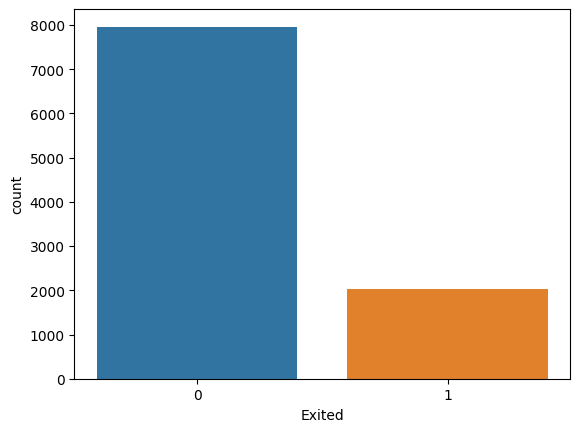

In [25]:
sns.countplot(dataset, x='Exited', label='Count')
plt.plot()

In [26]:
# staying with the bank
(dataset.Exited == 0).sum()

7963

In [27]:
# Exited customers from the bank
(dataset.Exited ==1).sum()

2037

## Correlation matrix and heatmap

In [28]:
dataset_2 = dataset.drop(columns = 'Exited')


In [29]:
dataset_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


[]

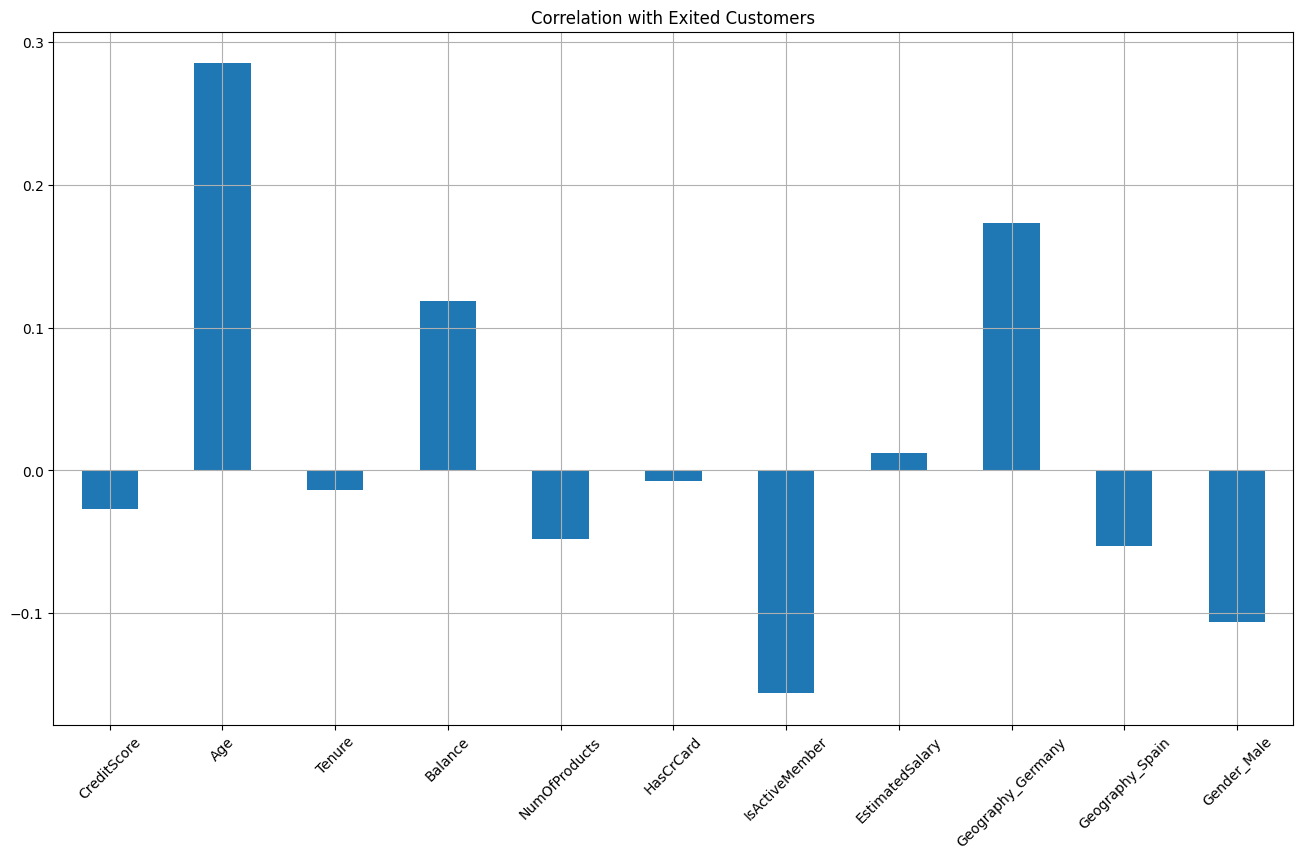

In [30]:
ax  = dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9),title="Correlation with Exited Customers", rot = 45, grid = True
)
ax.plot()

In [31]:
corr = dataset.corr()

In [32]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

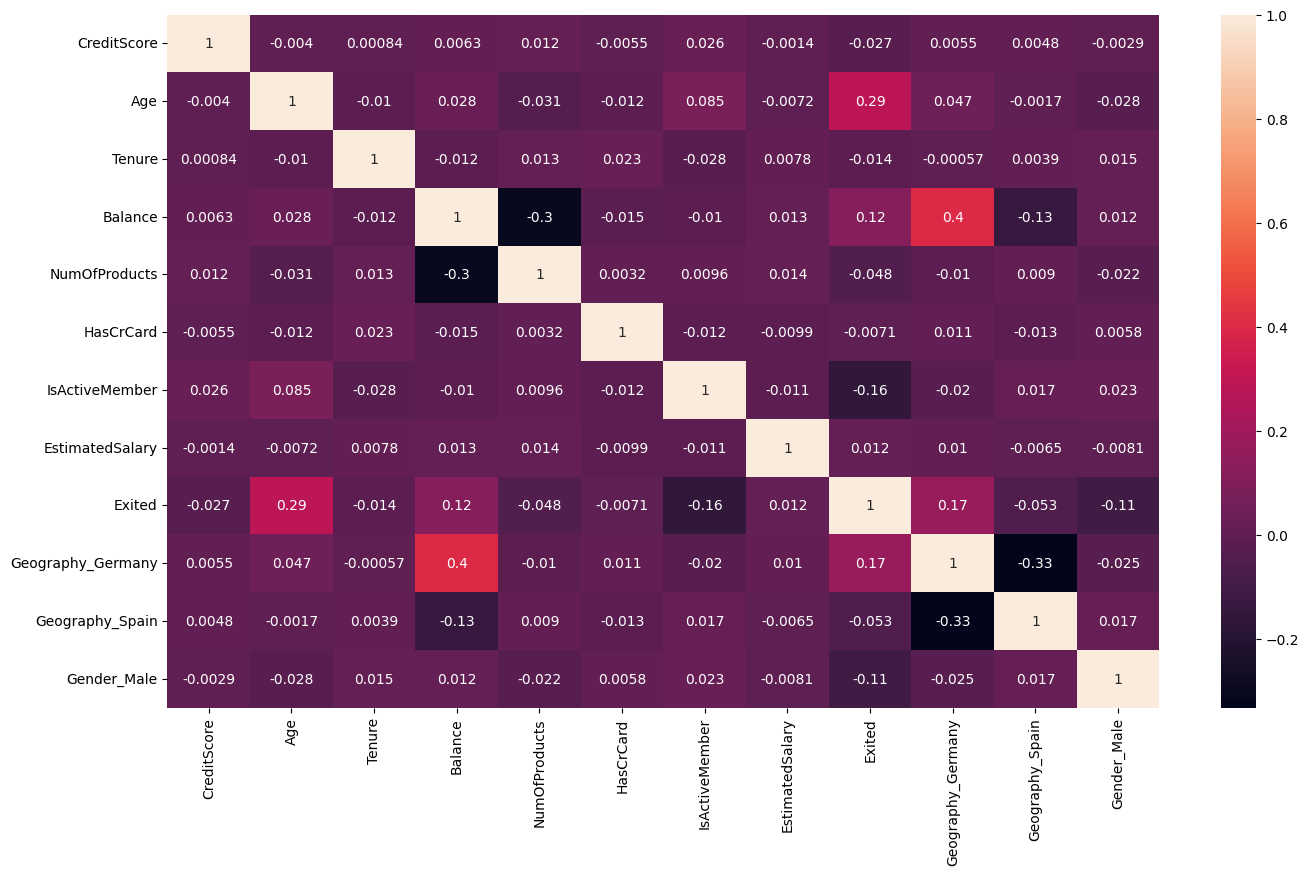

In [33]:
# Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting dataset into train and test dataset

In [34]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [35]:
# Matrix of features / independent variable
x = dataset.drop(columns = ['Exited'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [36]:
x.shape

(10000, 11)

In [37]:
# target / dependent variable
y = dataset['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
y.shape

(10000,)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [41]:
x_train.shape

(8000, 11)

In [42]:
x_test.shape

(2000, 11)

In [43]:
y_train.shape

(8000,)

In [44]:
y_test.shape

(2000,)

## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler() # create an instance of class

In [47]:
x_train = sc.fit_transform(x_train) # set the optimum parameters w and b then same is used while testing
x_test = sc.transform(x_test)

In [48]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [49]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Building the model

## 1) Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier_lr = LogisticRegression(random_state = 0)

In [52]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred = classifier_lr.predict(x_test)

In [54]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

In [55]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [56]:
results = pd.DataFrame([["Logistic Regression", acc, f1, prec, rec]],
                       columns =
                       ['Model', 'Accuracy', "F1", 'Precision', "Recall"])

In [57]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracies = cross_val_score(estimator = classifier_lr, X=x_train, y = y_train, cv= 10) # used 10 dataset randomly selected
print(f"Accuracy mean is {accuracies.mean()*100:.2f} %")
print(f"Standard Deviation is {accuracies.std()*100:.2f} %")


Accuracy mean is 80.84 %
Standard Deviation is 0.88 %


In [61]:
accuracies

array([0.81   , 0.80375, 0.80875, 0.80875, 0.82125, 0.805  , 0.82125,
       0.79625, 0.79375, 0.815  ])

## 2) Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
classifier_rm = RandomForestClassifier(random_state = 0)
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
y_pred = classifier_rm.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [66]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [67]:
model_results = pd.DataFrame([["Random Forest", acc, f1, prec, rec]],
                             columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [68]:
model_results

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.867,0.613372,0.745583,0.520988


In [69]:
results = results.append(model_results, ignore_index= True)

<ipython-input-69-194ba992cedd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index= True)


In [70]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [71]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 194,  211]])

### Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rm, X = x_train, y = y_train, cv=10)
accuracies

array([0.87125, 0.85125, 0.86875, 0.8725 , 0.85   , 0.8525 , 0.865  ,
       0.84125, 0.85625, 0.8675 ])

In [73]:
print(f"Accuracy mean is {accuracies.mean()*100:.2f} %")
print(f"Standard Deviation is {accuracies.std():.2f}")

Accuracy mean is 85.96 %
Standard Deviation is 0.01


## 3)  XGBoost Classifier

In [74]:
from xgboost import XGBClassifier

In [75]:
classifier_xg = XGBClassifier(random_state = 0)

In [76]:
classifier_xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [77]:
y_pred = classifier_rm.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

In [79]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

In [80]:
model_results_xg = pd.DataFrame([['XGBoost Classification', acc, f1, prec, rec]],
                                columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [81]:
results = results.append(model_results_xg, ignore_index  =True)

<ipython-input-81-8e14877c96d1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results_xg, ignore_index  =True)


In [82]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988
2,XGBoost Classification,0.867,0.613372,0.745583,0.520988


In [83]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 194,  211]])

### Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier_xg, X=x_train, y= y_train, cv = 10)
print(f"Accuracy mean is {accuracies.mean()*100:.2f}%")
print(f"Accuracy standard deviation is {accuracies.std():.2f}")

Accuracy mean is 85.12%
Accuracy standard deviation is 0.01


## 4) SVM

In [85]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state = 0)
classifier_svc.fit(x_train, y_train)
y_pred = classifier_svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_res = pd.DataFrame([['SVM',acc, f1, prec, rec]],
              columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
model_res

,Model,Accuracy,F1,Precision,Recall
0,SVM,0.8635,0.56872,0.789474,0.444444


In [86]:
results = results.append(model_res, ignore_index  =True)

<ipython-input-86-9bff0579d1d6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_res, ignore_index  =True)


In [87]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classification,0.8670,0.613372,0.745583,0.520988
3,SVM,0.8635,0.568720,0.789474,0.444444


In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1547,   48],
       [ 225,  180]])

### Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier_svc, X=x_train, y= y_train, cv = 10)
print(f"Accuracy mean is {accuracies.mean()*100:.2f}%")
print(f"Accuracy standard deviation is {accuracies.std():.2f}")

Accuracy mean is 85.24%
Accuracy standard deviation is 0.01


# Part 3: Randomized Search to find the best parameters ( XGBoost Classifier )

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
parameters = {
    'learning_rate':[0.05, 0.20, 0.25, 0.30],
    'max_depth':[3, 8, 10,  15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma':[0.0,   0.3, 0.4],
    'colsample_bytree':[0.3,  0.5 , 0.7]
}

In [92]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.5, 0.7]}

In [111]:
randomized_search = RandomizedSearchCV(estimator=classifier_xg, param_distributions=parameters, n_iter=5, scoring = 'roc_auc',n_jobs=-1, cv=5, verbose = 3 )

In [112]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'gamma': [0.0, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25, 0.3],
                                        'max_depth': [3, 8, 10, 15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [113]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [96]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [97]:
randomized_search.best_score_

0.864561881808927

In [98]:
classifier_xg.score(x_train, y_train)

0.95475

In [99]:
classifier_xg.score(x_test, y_test)

0.8525

# Part 4: Final Model ( XGBClassifier )

In [101]:
from xgboost import XGBClassifier

In [114]:
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3,  monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [115]:
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc,f1, prec, rec]],
                             columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index = False)
results

<ipython-input-115-7b23c076eb0b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = False)


,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classification,0.8670,0.613372,0.745583,0.520988
3,SVM,0.8635,0.568720,0.789474,0.444444
4,Final XGBoost,0.8665,0.612482,0.742958,0.520988
5,Final XGBoost,0.8665,0.615827,0.737931,0.528395
0,Final XGBoost,0.8645,0.616690,0.721854,0.538272


In [116]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 187,  218]])

### Cross Validation

In [118]:
from sklearn.model_selection import cross_val_score
accu = cross_val_score(estimator = classifier, X=x_train, y=y_train, cv =10)
print(f'Accuracy mean is : {accu.mean()*100:.2f} %')
print(f"Accuracy standard deviation is : {accu.std():.2f}")

Accuracy mean is : 86.30 %
Accuracy standard deviation is : 0.01


# Part 5: Predicting a single observation

In [119]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [120]:
single_obs = [[625, 45, 5, 12500.01, 1,0,1, 101348.88,0,0,1]]

In [ ]:
single_obs

In [122]:
out = classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [123]:
out

array([0])